# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [2]:
df_tracks = pd.read_parquet("data/tracks.parquet")
df_catalog = pd.read_parquet("data/catalog_names.parquet")
df_interactions = pd.read_parquet("data/interactions.parquet")

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

## tracks

In [20]:
df_tracks.sample(10)

,track_id,albums,artists,genres
200910,7321791,[774452],[302220],"[19, 325]"
950019,85301475,[16265111],"[3426001, 11117116]",[16]
849404,68480226,[11357176],[2834315],"[11, 20]"
933470,81342099,"[15040575, 15261329, 15380084, 15668394, 16106...","[239112, 3152358]","[127, 335]"
477750,33107564,"[4042800, 4215556, 4502312, 4713774, 6090778, ...",[1611350],"[68, 127, 335]"
784177,60883696,[9447822],[8502216],"[2, 102]"
849891,68560623,"[11377666, 11377689, 12621649, 16579667]",[200277],[11]
720142,53446122,[7637361],[603307],[21]
470021,32671135,[3984213],[1582314],"[11, 20]"
730264,54570565,[7879607],[3277095],[11]


In [21]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980977 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   track_id  980977 non-null  int64 
 1   albums    980977 non-null  object
 2   artists   980977 non-null  object
 3   genres    980977 non-null  object
dtypes: int64(1), object(3)
memory usage: 37.4+ MB


In [22]:
df_tracks.isna().sum()

track_id    0
albums      0
artists     0
genres      0
dtype: int64

In [31]:
df_tracks.track_id.duplicated().sum()

0

In [23]:
for item in df_tracks.columns[1: ]:
    isna = df_tracks[item].apply(lambda x: len(x) == 0).sum()
    print(f"{item}_isna: {isna}")

albums_isna: 0
artists_isna: 0
genres_isna: 0


## catalog_names

In [24]:
df_catalog.sample(10)

,id,type,name
916712,1357112,track,Voices
1054404,14562406,track,Waters Rising
916491,1345767,track,الله على حبك
1225342,28343229,track,Birthday
421246,8152385,album,The Hype
301393,4922027,album,Sometimes
1156923,23127684,track,Lindy Lou
1045422,12800698,track,Lights Out
1258885,31169727,track,Атлантида
86866,881022,album,Samorost2


In [25]:
df_catalog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793448 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 54.7+ MB


In [32]:
df_catalog[['id', 'type']].duplicated().sum()

0

In [26]:
df_catalog.isna().sum()

id      0
type    0
name    0
dtype: int64

In [27]:
df_catalog.groupby('type').agg({'id': 'count'})

,id
type,
album,658724
artist,153581
genre,166
track,980977


## interactions

In [28]:
df_interactions.sample(10)

,user_id,track_id,track_seq,started_at
245,718698,3719794,246,2022-05-11
234,128252,15867060,235,2022-05-02
18,301992,32226743,19,2022-09-16
31,160884,60073,32,2022-05-30
118,201981,74682737,119,2022-09-19
120,197956,38883870,121,2022-12-12
288,969546,80408246,289,2022-12-11
118,388635,87834364,119,2022-12-04
480,488948,48591698,481,2022-08-09
73,1209760,27032843,74,2022-07-30


In [29]:
df_interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222184449 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [30]:
df_catalog.isna().sum()

id      0
type    0
name    0
dtype: int64

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

Итог:
- Типы данных были считаны корректно. Нет необходимости в преобразовании или трансформации. 
- Есть пропущенные значения в датасете df_tracks. Наличие таких записей снижает качество данных и ограничивает применение большинства рекомендательных алгоритмов, поэтому необходимо удалить строки пропусками из датачсета.
- Необходимо удалить взаимодействия пользователей, связанные с треками из пункта 2.


In [3]:
info_isna = (
    (df_tracks['albums'].apply(lambda x: len(x) == 0)) 
    | (df_tracks['artists'].apply(lambda x: len(x) == 0)) 
    | (df_tracks['genres'].apply(lambda x: len(x) == 0))
)

In [4]:
print(f"Треков с 1 и более пропусков: {df_tracks[info_isna].shape[0]}")

Треков с 1 и более пропусков: 19023


In [5]:

track_id = df_tracks[info_isna].track_id
df_tracks = df_tracks[~ df_tracks.track_id.isin(track_id)]
df_interactions = df_interactions[~df_interactions.track_id.isin(track_id)]
df_catalog = df_catalog[~ ((df_catalog.id.isin(track_id)) & (df_catalog.type == 'track') )]


# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

In [6]:
df_count_track = df_interactions.groupby(['user_id'], as_index=False)\
    .agg({'track_id': 'count'}).rename(columns={'track_id': 'track_c'})
df_count_track.head()

,user_id,track_c
0,0,26
1,1,36
2,2,14
3,3,33
4,4,255


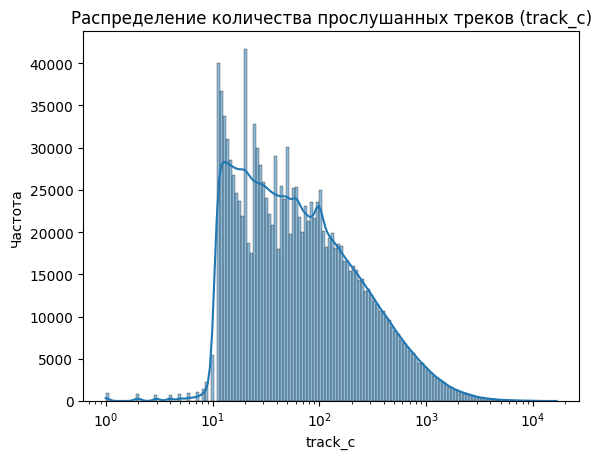

In [11]:
sns.histplot(data=df_count_track, x="track_c", kde=True, log_scale=True, bins=150)
plt.title("Распределение количества прослушанных треков (track_c)")
plt.xlabel("track_c")
plt.ylabel("Частота")
plt.show()

Наиболее популярные треки

In [12]:
df_track_popular = df_interactions.groupby(['track_id'], as_index=False)\
    .agg({'user_id': 'count'}).rename(columns={'user_id': 'user_с'})
df_track_popular.head()

,track_id,user_с
0,26,5
1,38,8
2,135,16
3,136,7
4,138,17


In [14]:
df_track_popular_top = df_track_popular.sort_values('user_с', ascending=False).head(10)

In [18]:
df_track_popular_top = df_track_popular_top.merge(df_catalog.query("type == 'track'"), left_on='track_id', right_on='id', how='inner')
df_track_popular_top

,track_id,user_с,id,type,name
0,53404,111062,53404,track,Smells Like Teen Spirit
1,33311009,106921,33311009,track,Believer
2,178529,101924,178529,track,Numb
3,35505245,99490,35505245,track,I Got Love
4,65851540,86670,65851540,track,Юность
5,24692821,86246,24692821,track,Way Down We Go
6,32947997,85886,32947997,track,Shape of You
7,51241318,85244,51241318,track,In The End
8,795836,85042,795836,track,Shape Of My Heart
9,45499814,84748,45499814,track,Life


Наиболее популярные жанры

In [37]:
df_genres_exploded = df_tracks.explode('genres')

In [43]:
df_genres_popular = df_track_popular.merge(df_genres_exploded, on='track_id', how='inner')
df_genres_popular = df_genres_popular.groupby('genres', as_index=False).agg({'user_с': 'sum'})

In [50]:
df_genres_popular_top = df_genres_popular.sort_values('user_с', ascending=False).head(10)
df_genres_popular_top = df_genres_popular_top.merge(df_catalog.query("type == 'genre'"), left_on='genres', right_on='id', how='inner')

In [51]:
df_genres_popular_top

,genres,user_с,id,type,name
0,11,55578305,11,genre,pop
1,75,37799821,75,genre,rap
2,102,31091989,102,genre,allrock
3,20,26626234,20,genre,ruspop
4,3,25303695,3,genre,rusrap
5,68,20120694,68,genre,electronics
6,16,16291557,16,genre,dance
7,2,13166147,2,genre,rusrock
8,14,12772620,14,genre,rock
9,47,12437375,47,genre,metal


Треки, которые никто не прослушал

In [54]:
df_track_no_listen = df_track_popular.merge(df_tracks, on='track_id', how='right')
df_track_no_listen = df_track_no_listen[df_track_no_listen.user_с.isna()]

In [57]:
df_track_no_listen.shape[0]

0

# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [ ]:
df_items = df_tracks.rename(columns={'track_id': 'item_id'}).copy()

df_events = df_interactions.rename(columns={'track_id': 'item_id'}).copy()

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [ ]:
df_items.to_parquet('data/items.parquet')
df_events.to_parquet('data/events.parquet')

In [ ]:
import boto3
import os
 
def get_session():
    session = boto3.session.Session()
 
    return session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
        aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
    )
 
bucket_name = "s3-student-mle-20250513-c87f7369b8-freetrack"
s3_folder = "recsys/" 
local_files_path = ["data/items.parquet", "data/events.parquet"]

s3 = get_session()


for item in local_files_path:
    s3.upload_file(item, bucket_name, s3_folder + item)

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

In [ ]:
import gc

del df_catalog, df_events, df_items, df_tracks, df_interactions
gc.collect()

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [2]:
df_items = pd.read_parquet("data/items.parquet")
df_events = pd.read_parquet("data/events.parquet")
df_catalog = pd.read_parquet("data/catalog_names.parquet")

In [4]:
df_items.sample(10)

,item_id,albums,artists,genres
172971,4525364,[511630],[239112],"[127, 335]"
764119,58653205,[8924549],[4318525],"[6, 70]"
410776,28232188,[3373750],[4288924],[68]
79847,699862,[77091],[209196],"[7, 112]"
137838,2763701,"[296549, 296945, 3354540, 3375381, 3861128, 59...",[48169],"[47, 157]"
971180,90642713,"[17945237, 19876845, 21423766]","[4947805, 5426588]","[44, 75]"
698915,51488215,[7183238],[6382690],"[3, 75]"
465354,32412162,[3949535],[303270],"[47, 308]"
879728,72390183,"[12445892, 12546467]","[5453005, 10173308, 5382299]",[68]
182953,5336180,[587096],[1020197],"[19, 325]"


In [5]:
df_events.sample(10)

,user_id,item_id,track_seq,started_at
13,696159,41764252,14,2022-09-22
21,426222,23252198,22,2022-05-08
76,142829,455887,77,2022-08-24
415,535994,91793680,416,2022-10-20
38,128993,9769,39,2022-01-03
1932,581343,30840415,1933,2022-09-09
596,1370107,88651174,597,2022-12-25
91,1267949,59251631,92,2022-07-29
2038,448434,5185272,2039,2022-06-16
159,613386,123434,160,2022-02-22


# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.  
Разбейте данные на тренировочную и тестовую выборки: в тренировочную отнесите все данные до 16 декабря 2022 года (не включительно).

In [6]:
import pandas as pd

def train_test_split_by_date(df: pd.DataFrame, date_col: str, split_date: str):

    df = df.copy()
    all = df.shape[0]
    df[date_col] = pd.to_datetime(df[date_col])

    train = df[df[date_col] < pd.Timestamp(split_date)]
    test = df[df[date_col] >= pd.Timestamp(split_date)]

    print(f"Train shape: {train.shape}, Test shape: {test.shape}")
    print(f"Train persent: {round(train.shape[0] / all, 2)}, Test persent: {round(test.shape[0] / all, 2)}")
    print(f"Граница разделения: {split_date}")
    print(f"Train период: {train[date_col].min().date()} — {train[date_col].max().date()}")
    print(f"Test период:  {test[date_col].min().date()} — {test[date_col].max().date()}")

    return train, test

events_train, events_test = train_test_split_by_date(df_events, 'started_at', '2022-12-16')

Train shape: (208334360, 4), Test shape: (13850089, 4)
Train persent: 0.94, Test persent: 0.06
Граница разделения: 2022-12-16
Train период: 2022-01-01 — 2022-12-15
Test период:  2022-12-16 — 2022-12-31


# Топ популярных

Рассчитаем рекомендации как топ популярных.

Будем брать данные только из трейна 

In [7]:
df_track_top = events_train\
    .groupby('item_id', as_index=False)\
    .agg({'user_id': 'nunique'})\
    .rename(columns={'user_id': 'unique_user_c'})\
    .sort_values('unique_user_c', ascending=False)\
    .head(100)

In [8]:
df_track_top.head()

,item_id,unique_user_c
9092,53404,110026
481767,33311009,101076
26638,178529,100866
509948,35505245,95523
366387,24692821,84153


In [9]:
path_top_100 = "recommendations/top_popular.parquet"
df_track_top.to_parquet(path_top_100)

In [ ]:
import boto3
import os
 
def get_session():
    session = boto3.session.Session()
 
    return session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
        aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY")
    )
 
bucket_name = "s3-student-mle-20250513-c87f7369b8-freetrack"
s3_folder = "recsys/" 
local_files_path = [path_top_100]

s3 = get_session()


for item in local_files_path:
    s3.upload_file(item, bucket_name, s3_folder + item)

# Персональные

Рассчитаем персональные рекомендации.  
Так как track_seq — номер места трека в истории пользователя, будем использовать это значение как рейтинг

In [ ]:
import scipy
import sklearn.preprocessing

user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(df_events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(df_items["item_id"])
df_items["item_id_enc"] = item_encoder.transform(df_items["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

In [18]:
user_item_matrix_train = scipy.sparse.csr_matrix(
    (
    events_train["track_seq"],
    (events_train["user_id_enc"], events_train["item_id_enc"])
    ),
    dtype=np.int8
)
user_item_matrix_train

<Compressed Sparse Row sparse matrix of dtype 'int8'
	with 208334360 stored elements and shape (1372767, 980977)>

In [19]:
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train) 

/home/mle-user/env_recsys_start/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mle-user/env_recsys_start/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|██████████| 50/50 [1:06:43<00:00, 80.07s/it]


In [ ]:
als_model.save("model/als_model")

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.